In [50]:
import os
import numpy as np
import pandas as pd
import PcmPy as pcm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
dataset = ['stroke', 'intact']
tinfo = pd.read_csv('../data/pretraining/tinfo.tsv', sep='\t')
N = tinfo.subj_id.max()

In [52]:
euc = np.zeros((2, N, 5, 6, 6)) # (groups, n_subj, n_finger, dir, dir)
cos = np.zeros_like(euc)
for d, ds in enumerate(dataset):
    for f, fi in enumerate(tinfo.finger.unique()):
        for s, sn in enumerate(tinfo.subj_id.unique()):
            tinfo_s = tinfo[(tinfo.subj_id == sn) & (tinfo.group == ds)]
            X = np.load(f'../data/pretraining/single_finger.pretraining.{ds}.{sn}.npy') # (trials, time, channels)
            X_f = X[tinfo_s.finger == f, 50]
            X_m = X_f.reshape(6, -1, 15).mean(axis=1)
            G = X_m @ X_m.T
            euc[d, s, f] = pcm.G_to_dist(G)
            cos[d, s, f] = np.arccos(pcm.G_to_cosine(G))

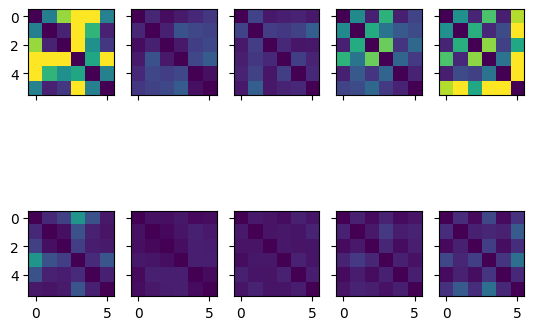

In [53]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)

for d, ds in enumerate(dataset):
    for f, fi in enumerate(tinfo.finger.unique()):
        ax = axs[d, f]
        ax.imshow(euc[d, :, f].mean(axis=0), vmin=0, vmax=.5)

plt.show()

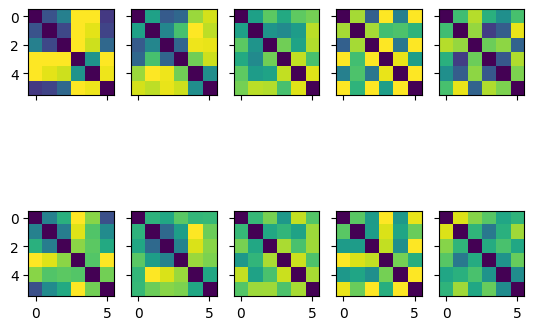

In [54]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)

for d, ds in enumerate(dataset):
    for f, fi in enumerate(tinfo.finger.unique()):
        ax = axs[d, f]
        ax.imshow(cos[d, :, f].mean(axis=0), vmin=0, vmax=.6)

plt.show()

In [55]:
scaler = StandardScaler()
pca = PCA()
var_expl = np.zeros((2, N, 15)) # (groups, n_subj, n_channels)
for d, ds in enumerate(dataset):
    for s, sn in enumerate(tinfo.subj_id.unique()):
        tinfo_s = tinfo[(tinfo.subj_id == sn) & (tinfo.group == ds)]
        X = np.load(f'../data/pretraining/single_finger.pretraining.{ds}.{sn}.npy') # (trials, time, channels)
        X_r = X.reshape(-1, data.shape[-1])
        X_norm = scaler.fit_transform(X_r)
        pca.fit(X_norm)
        var_expl[d, s] = pca.explained_variance_ratio_

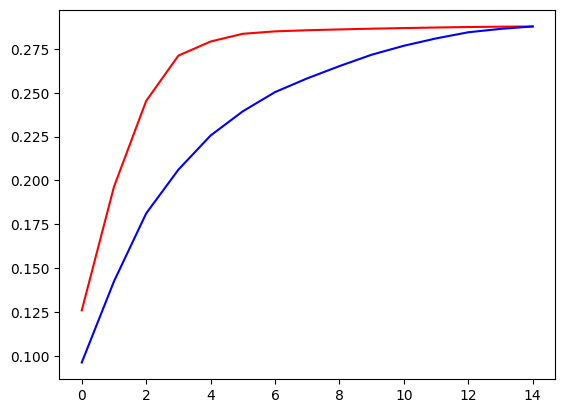

In [56]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(var_expl[0].mean(axis=0)), color='r', label='stroke')
ax.plot(np.cumsum(var_expl[1].mean(axis=0)), color='b', label='intact')

plt.show()